# 01 Markov State Model basics

In this note, we construct a MSM for conformational dynamics of a coarse-grained (Ca-atom) Adenylate kinase model. 

In [1]:
# first, we load packages. This takes time...
using PyPlot, Random
using MDToolbox
ENV["COLUMNS"] = 100 # display width for MDToolbox
Random.seed!(755);

In [2]:
# first, read a pdb of coarse-grained (Ca-atom) Adenylate Kinase structure
t = mdload("data/AdK_closed.pdb")

1x214 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1MET                       | 2ARG                       |  …   214GLY                     |
| 2CA                        | 10CA                       |  …   1658CA                     |
|     9.97    -9.03     9.82 |    10.38    -6.71     6.85 |  …       5.09   -17.11     9.36 |

In [3]:
# then, add MD trajectory data 
t = mdload("data/AdK.nc", top=t)

20001x214 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1MET                       | 2ARG                       |  …   214GLY                     |
| 2CA                        | 10CA                       |  …   1658CA                     |
|     9.97    -9.03     9.82 |    10.38    -6.71     6.85 |  …       5.09   -17.11     9.36 |
|     0.01    17.58     8.30 |     1.70    14.27     9.20 |        -10.49    16.81     8.96 |
|    -0.06    17.26     8.54 |     2.00    14.04     8.56 |        -10.21    17.38     8.81 |
|    -0.31    17.06     7.99 |     2.05    14.15     8.76 |         -9.88    17.18     8.51 |
|    -0.95    17.10     9.79 |     1.55    14.26     9.27 |        -10.67    16.72    12.16 |
|     0.17    17.04     8.59 |     2.41    13.95     8.49 |  …     -10.59    16.89     8.00 |
|    -0.45    16.92     7.98 |     2.15    14.17     8.52 |        -10.43    16.83     8.60 |
|    -0.17    17.49     8.

In [4]:
# superimpose MD snapshots to the 1st-frame closed structure
t = superimpose(t[1, :], t)

20001x214 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1MET                       | 2ARG                       |  …   214GLY                     |
| 2CA                        | 10CA                       |  …   1658CA                     |
|     9.97    -9.03     9.82 |    10.38    -6.71     6.85 |  …       5.09   -17.11     9.36 |
|    11.70    -6.97     9.76 |    11.55    -5.85     6.12 |          6.55   -16.06    11.19 |
|    11.73    -7.35     9.22 |    11.17    -5.37     6.00 |          6.93   -16.03    11.34 |
|    11.21    -7.19     9.28 |    11.45    -5.39     5.93 |          6.90   -15.54    11.22 |
|    11.71    -9.27     8.72 |    11.30    -6.59     6.03 |          8.08   -18.59     9.09 |
|    11.70    -7.30     8.92 |    11.23    -5.09     5.84 |  …       5.78   -15.99    11.24 |
|    11.20    -7.22     9.06 |    11.42    -5.16     5.85 |          6.64   -15.89    11.07 |
|    11.78    -7.03     9.

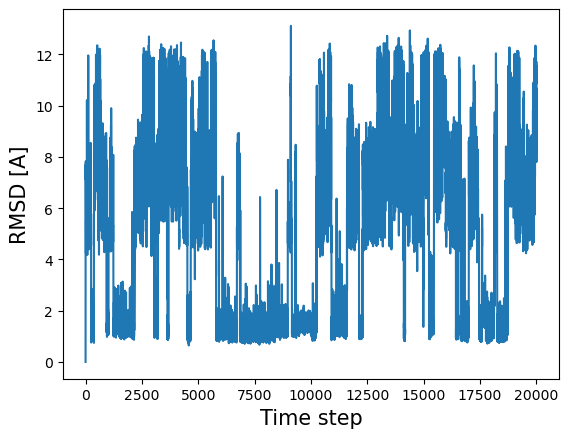

In [5]:
# compute RMSDs of MD trajectoy snapshots
rmsd = compute_rmsd(t[1, :], t)
plot(rmsd)
xlabel("Time step",fontsize=15)
ylabel("RMSD [A]",fontsize=15)
savefig("01_rmsd.png", dpi=200)

# Feature extraction and dimensional reduction

The following computations require a large amount of memory, so be careful if you are using low spec computers.

We extract distance-map vectors as features from MD data by using `compute_distancemap()`

In [6]:
# compute distance-map vectors
X = compute_distancemap(t)

20001×22366 Array{Float64,2}:
 10.1438  12.398   15.9624  19.1545  22.6873  …  6.09363  7.94529  5.25371  5.5124   6.12934
 10.3332  12.6005  16.1304  19.4085  23.0044     6.25391  8.25971  5.2465   5.41024  5.82211
 10.2117  12.5286  15.9796  19.2654  22.8531     5.87168  8.28831  4.93575  5.49904  6.17932
 10.0946  12.4113  15.9741  19.0246  22.5432     5.91033  8.33872  5.19636  5.75339  6.40843
 10.2821  12.5055  15.9897  19.3105  22.8226     6.19921  8.37272  5.21341  5.59676  5.63167
 10.2352  12.7682  16.2028  19.5219  22.9709  …  6.2383   8.23774  5.04611  5.22985  5.79254
 10.1442  12.4723  15.9889  19.2758  22.6288     5.81743  8.17137  5.39351  5.78911  5.86
 10.1114  12.4345  15.9675  19.2173  22.8161     5.98918  8.18575  5.31747  5.57702  6.20678
 10.1165  12.484   15.9965  19.1478  22.6177     5.9038   7.92521  5.24774  5.25783  6.31928
 10.003   12.3463  15.695   19.0694  22.6625     6.15529  8.20849  5.28394  5.43506  6.2803
 10.1545  12.5588  16.0852  19.3564  22.8852

In [7]:
# Principal component analysis of distance-map vectors
PCA = pca(X, k=30)
#TICA = tica(X, 100)

(projection = [530.9639226624276 82.23375950159323 … -0.07983399541081945 -1.1375597633237886; -320.90436307701356 -47.27662822290686 … 15.510217603329883 4.9917358851595965; … ; -627.1037991181597 125.139333233892 … -0.24321671627566693 -17.098609027824182; -702.4039937323416 177.3844853357743 … -4.659581970548093 -9.367411939707786], mode = [-8.22941410724301e-6 -5.979468089137977e-6 … 0.00015884210044681227 -0.00027147941887141724; -3.5411587720986357e-5 6.501394318987828e-6 … 0.0007085608091006937 0.00043734622127187265; … ; 6.0404055021245426e-5 0.00021206403101261262 … -0.0037744901546338176 -0.005727610608479335; 5.111230079727308e-5 0.00019359252811821878 … -0.005227627278120389 -0.004741788838339883], variance = [3.307292867961151e6, 23128.0307725777, 10384.985114692749, 4374.827141439901, 744.9704153737771, 208.38194569578505, 186.76823233881257, 51.50640294967846, 21.710399984682436, 14.32403385087954  …  0.4423447648595202, 0.4105468506089831, 0.31764487467327446, 0.2182245

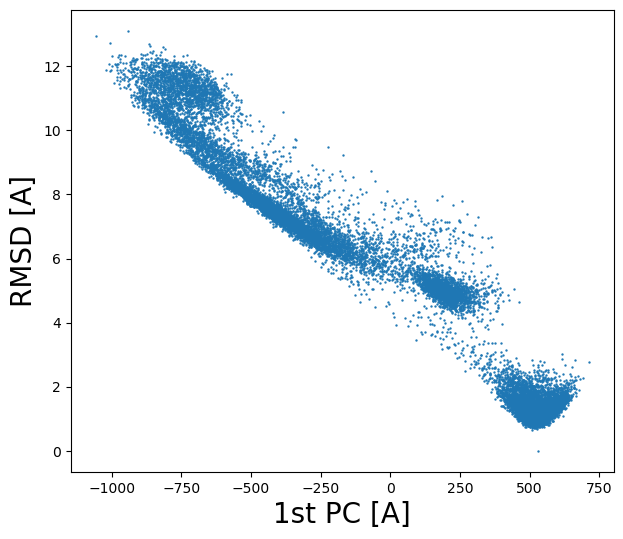

In [8]:
# Scatter plots of RMSD, PC1, and PC2
fig, ax = subplots(figsize=(7, 6))
ax.scatter(PCA.projection[:, 1], rmsd, s=0.5)
xlabel("1st PC [A]",fontsize=20)
ylabel("RMSD [A]",fontsize=20)
savefig("01_scatter_rmsd_pc1.png", dpi=200)

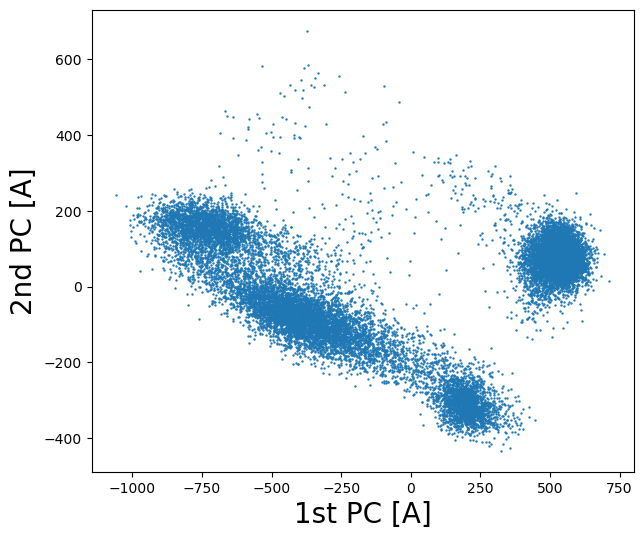

In [9]:
fig, ax = subplots(figsize=(7, 6))
ax.scatter(PCA.projection[:, 1], PCA.projection[:, 2], s=0.5)
xlabel("1st PC [A]",fontsize=20)
ylabel("2nd PC [A]",fontsize=20)
savefig("01_scatter_pc1_pc2.png", dpi=200)

In [10]:
# check the structures in some PC1 region
index = findall(x -> x > 400.0,  PCA.projection[:, 1])
mdsave("tmp.pdb", t[index[1:10], :]);
run(`pymol tmp.pdb`);

 PyMOL(TM) Molecular Graphics System, Version 2.4.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected OpenGL version 2.1. Shaders available.
 Detected GLSL version 1.20.
 OpenGL graphics engine:
  GL_VENDOR:   ATI Technologies Inc.
  GL_RENDERER: AMD Radeon Pro Vega 64 OpenGL Engine
  GL_VERSION:  2.1 ATI-3.10.18
 Detected 20 CPU cores.  Enabled 

# Clustering

Next, we perform a clustering of feature data to define states for constructing a MSM. 

In [11]:
# Here we use a rather small number of of states just for reducing computational time
nstate = 50
CLUST = clusterkcenters(PCA.projection[:, 1:10], nstate)

1 iteration  distance_max = 328.336598  kcluster = 50
2 iteration  distance_max = 318.052380  kcluster = 50
3 iteration  distance_max = 318.052380  kcluster = 50
4 iteration  distance_max = 318.052380  kcluster = 50
5 iteration  distance_max = 318.052380  kcluster = 50
6 iteration  distance_max = 318.052380  kcluster = 50
7 iteration  distance_max = 318.052380  kcluster = 50
8 iteration  distance_max = 317.223465  kcluster = 50
9 iteration  distance_max = 317.223465  kcluster = 50
10 iteration  distance_max = 315.063185  kcluster = 50


(indexOfCluster = [43, 12, 12, 12, 24, 12, 12, 12, 12, 12  …  36, 28, 7, 36, 44, 11, 21, 29, 21, 21], center = [-518.0703453124884 -25.27281860590399 … -36.93041172806979 15.706212560687078; 713.0918656924342 15.911128460385397 … 34.709117419772696 -22.421573383620792; … ; 282.23360936390395 -54.216962008918365 … -7.564498438123669 28.177052100442364; 100.12094324689012 -18.712166997183196 … 32.341119919131486 26.338395160443024], distanceFromCenter = [41624.00634836599; 30488.923141477448; … ; 43847.41963960416; 45673.32838959153], indexOfCenter = [699, 1747, 10798, 5301, 10235, 2920, 13415, 6864, 14385, 3727  …  906, 19980, 5838, 3360, 4058, 4439, 3616, 3851, 18729, 5915])

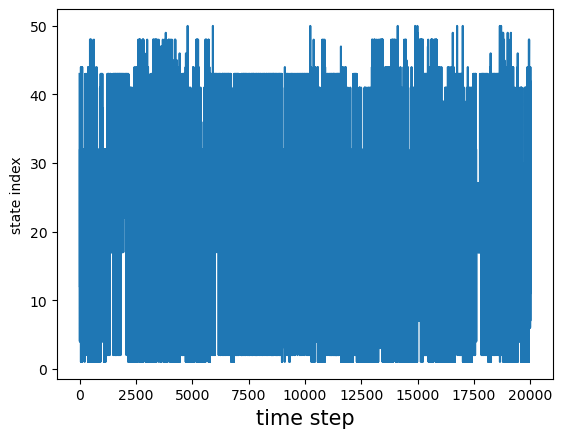

PyObject Text(24.000000000000007, 0.5, 'state index')

In [12]:
plot(CLUST.indexOfCluster)
xlabel("time step", fontsize=15)
ylabel("state index")

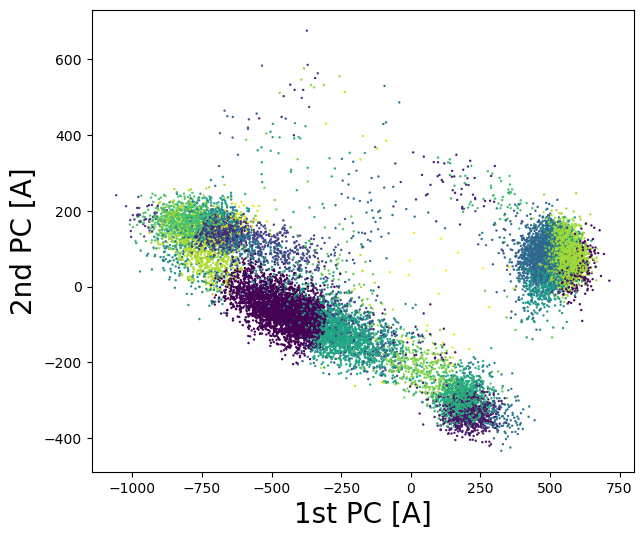

PyObject Text(38.0, 0.5, '2nd PC [A]')

In [13]:
# scatter plot of PC1 and PC2 colored by clustered states
fig, ax = subplots(figsize=(7, 6))
ax.scatter(PCA.projection[:, 1], PCA.projection[:, 2], s=0.5, c=CLUST.indexOfCluster)
xlabel("1st PC [A]",fontsize=20)
ylabel("2nd PC [A]",fontsize=20)

# Estimation of transition probability matrix from data

Finally, we compute a counting matrix from the result of clustering and estimate the transition probability matrix for MSM.

Likelihood function of observing the data given a transition probability matrix $T$

\begin{aligned}
  L(T) =  P({\rm data} | T) = \prod_i \prod_j T_{ij}^{C_{ij}}
\end{aligned}

Here, $C_{ij}$ is a counting matrix whose elements represents the number of transitions between states obesrved in the given data

First, we compute the counting matrix from the result of the clustering

In [14]:
# compute counting matrix
C = msmcountmatrix(CLUST.indexOfCluster, tau=1000)

50×50 Array{Int64,2}:
 521  51  7  127  6  1  144  0  16  1  88  62  3  …  3  18  2  65  0  543  144  3  0  2  34  1  1
  69  16  0   18  1  0   12  0   2  0   4   1  0     0   1  0   7  0  101    9  0  1  0   1  0  0
   8   2  0    1  0  0    0  0   0  0   1   1  0     0   0  0   1  0    2    3  0  0  0   0  0  0
 108  16  2   17  5  0   18  0   3  0   8  13  1     0   4  2  16  0  199   20  4  0  0   5  0  3
   5   1  0    1  0  0    1  0   0  0   0   0  0     0   0  0   0  0   15    1  0  0  0   1  0  0
   0   0  0    0  0  0    0  0   0  0   0   0  0  …  0   0  0   0  0    1    1  0  0  0   0  0  0
 152   8  2   20  0  1   17  0   1  0   4  11  0     0   1  0  12  0   80   29  1  1  0   1  0  2
   2   0  0    0  0  0    0  0   0  0   0   0  0     0   0  0   0  0    2    0  0  0  0   0  0  0
  12   2  0    1  1  0    1  0   0  0   1   3  0     0   0  0   3  0    7    1  0  0  0   0  0  0
   0   0  0    0  0  0    0  0   0  0   0   2  0     0   0  0   0  0    0    0  0  0  0   0  0  

Then, we estimate the transition probability matrix by maximizing the likelihood function given above

In [15]:
# estimate the transition probability matrix by maximizing the likelihood function
T, p = msmtransitionmatrix(C)

10 iteration  LogLikelihood = -4.99621e+04  delta = 3.42381e-04  tolerance = 1.00000e-04


([0.16321453054236332 0.018257841427408293 … 0.0008039249027459601 0.000459163599149401; 0.14695439616519373 0.038096488673874565 … 0.0 0.0; … ; 0.24337343002848158 0.0 … 0.0 0.0; 0.13948290997940688 0.0 … 0.0 0.0], [0.174362583438621, 0.021663076997825808, 0.0016377487111111, 0.03827729951751212, 0.0021938993060086945, 0.0004215136711947022, 0.02991803301511463, 0.00021494141232373759, 0.0024575517597271754, 0.00026833652466329023  …  0.017095818901375518, 0.00036994322249093466, 0.21018746542993855, 0.03439058233529957, 0.0012719666922719674, 0.0005277768225647659, 0.000328621667588297, 0.006233646807808338, 0.0005759643643803819, 0.000573983948144508])

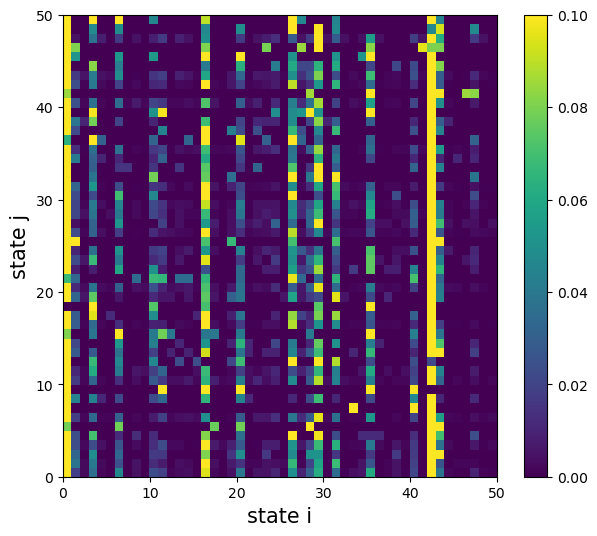

In [16]:
# heatmap of the estimated transiton probabilities
fig, ax = subplots(figsize=(7, 6))
plt = ax.pcolor(T, vmin=0, vmax=0.1)
cbar = fig.colorbar(plt, ax=ax)
xlabel("state i",fontsize=15)
ylabel("state j",fontsize=15)
savefig("01_transition_probability.png", dpi=200)

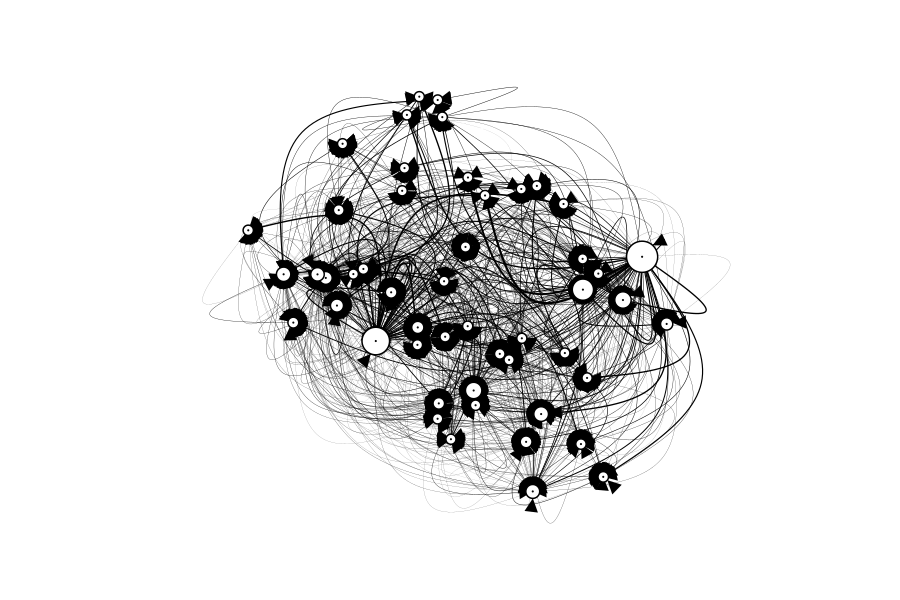

In [17]:
# graphical structure of MSM
msmplot(T, x=CLUST.center[:, 1], y=CLUST.center[:, 2], filename="01_msm.png", dpi=150)

# Validation

MSM often underestimate the timescale of dynamics. So we check the timescales of MSMs by checking the eigenvalues (implied timescales) of transition probability matrix. 

By checking whether the implied time-scale is comparable to the most-slowest behavior of the system, we validate that our MSM is consistent with the MD data. 

In [18]:
# compute implied timescales over various lag times (tau).
tau = 1:1000
implied_time = msmimpliedtime(CLUST.indexOfCluster, tau)

1000×49 Array{Union{Missing, Float64},2}:
 142.247    9.14222    5.77598    3.0056   …  missing  missing  missing  missing  missing
 169.011   12.4642     8.11314    3.81594     missing  missing  missing  missing  missing
 182.39    14.9374     9.74992    4.78255     missing  missing  missing  missing  missing
 187.924   17.0502    10.7386     5.54378     missing  missing  missing  missing  missing
 192.867   18.985     11.7985     6.26171     missing  missing  missing  missing  missing
 196.577   20.7234    12.9265     7.2232   …  missing  missing  missing  missing  missing
 200.276   22.1374    13.6463     8.12287     missing  missing  missing  missing  missing
 203.745   23.5472    14.4312     9.13502     missing  missing  missing  missing  missing
 205.222   24.9819    15.2828    10.2981      missing  missing  missing  missing  missing
 206.993   25.8973    15.9309    11.2042      missing  missing  missing  missing  missing
 207.634   27.105     16.3835    11.772    …  missing  mis

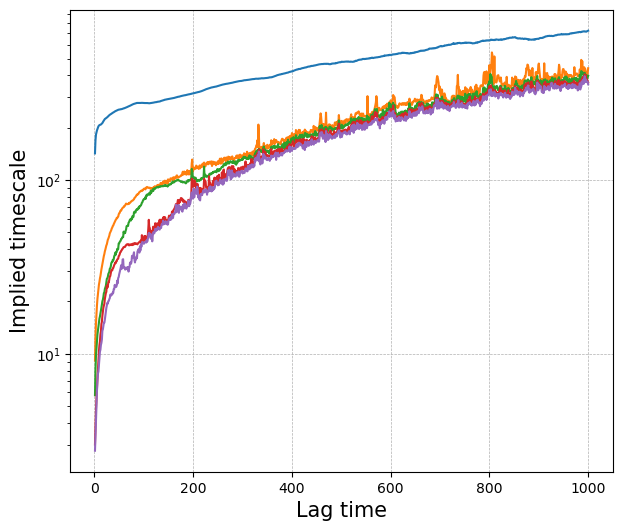

In [19]:
# plot the implied timescales as a function of lag time
fig, ax = subplots(figsize=(7, 6))
ax.semilogy(tau, implied_time[:, 1:5])
ax.grid(linestyle="--", linewidth=0.5);
xlabel("Lag time",fontsize=15)
ylabel("Implied timescale",fontsize=15)
savefig("01_implied_timescales.png", dpi=200)

# Export MSM data

In [20]:
# export the constructed MSM data for tutorial 03
using JLD2
@save "01_msm.jld2" T p PCA CLUST t

In [21]:
# For sebsequent tutorials, let's clear the memory or shut down the kernel
T = p = PCA = CLUST = t= nothing